## Pre-Processing and Training Data

In [3]:
#Importing all the libraries I believe I will be using
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from library.sb_utils import save_file

In [2]:
meta_df = pd.read_csv('SourceFiles/numerical_data.csv')

In [5]:
#as we can see, there are only numeric fields left in the Dataframe, netiher are null values left
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6726 entries, 0 to 6725
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   metastasis            6726 non-null   int64
 1   tneg                  6726 non-null   int64
 2   invasive              6726 non-null   int64
 3   breast_chest_radi     6726 non-null   int64
 4   nodal_radi            6726 non-null   int64
 5   chemo                 6726 non-null   int64
 6   antihormone           6726 non-null   int64
 7   her2_inhib            6726 non-null   int64
 8   neo                   6726 non-null   int64
 9   er                    6726 non-null   int64
 10  pr                    6726 non-null   int64
 11  p53                   6726 non-null   int64
 12  her2                  6726 non-null   int64
 13  node_status           6726 non-null   int64
 14  age                   6726 non-null   int64
 15  menopause             6726 non-null   int64
 16  node_p

In [7]:
#Counts of null values
na_df=pd.DataFrame(meta_df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount


In [8]:
#counts of response variable values
meta_df.metastasis.value_counts()

0    6193
1     533
Name: metastasis, dtype: int64

From our data (6726 records), 92% are metastasis free, while 8% presented metastasis

In [9]:
#Question: Is this an issue?
duplicateRowsDF = meta_df[meta_df.duplicated()]
duplicateRowsDF

,metastasis,tneg,invasive,breast_chest_radi,nodal_radi,chemo,antihormone,her2_inhib,neo,er,...,tumor_duct,tumor_lobular,size,grade,surgery_no_residual,surgery_residual,no primary site,conservation_surgery,mastectomy_surgery,no_surgery
4,0,0,1,1,0,0,1,0,0,1,...,1,0,1,2,1,0,0,1,0,0
58,0,0,1,1,0,0,0,0,0,1,...,1,0,1,2,1,0,0,1,0,0
60,0,0,1,1,0,0,0,0,0,1,...,1,0,1,2,1,0,0,1,0,0
104,0,0,1,0,0,0,0,0,0,1,...,0,1,1,1,1,0,0,0,1,0
110,0,0,1,1,0,0,1,0,0,1,...,1,0,1,2,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6716,0,1,1,1,0,0,0,0,0,-1,...,1,0,1,2,1,0,0,1,0,0
6718,0,1,1,1,0,0,0,0,0,-1,...,1,0,1,3,1,0,0,1,0,0
6720,0,0,1,1,0,1,0,0,0,1,...,1,0,1,2,1,0,0,1,0,0
6722,0,0,1,0,0,0,1,0,0,1,...,0,1,1,2,1,0,0,0,1,0


### Split the data into test and train subsamples

In [17]:
#from sklearn.model_selection import train_test_split

#y0 = meta_df[meta_df['metastasis']==0].metastasis.values
#X0 = meta_df[meta_df['metastasis']==0].drop('metastasis', axis=1).values

#X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=.2, random_state=1)

#y1 = meta_df[meta_df['metastasis']==1].metastasis.values
#X1 = meta_df[meta_df['metastasis']==1].drop('metastasis', axis=1).values

#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.2, random_state=1)

#X_train = np.concatenate((X0_train, X1_train))
#X_test = np.concatenate((X0_test, X1_test))
#y_train = np.concatenate((y0_train, y1_train))
#y_test = np.concatenate((y0_test, y1_test))

In [35]:
from sklearn.model_selection import train_test_split
y = meta_df.metastasis
X = meta_df.drop('metastasis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [36]:
#scale data
from sklearn import preprocessing
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [37]:
#Fit Random Forest Classifier
#Question: How to select the best n_estimators, and the n_jobs value?
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(n_estimators=300, random_state = 1, n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.918
Random Forest: f1-score=0.900


In [33]:
#print confusion matrix
print(cm)

[[1225   26]
 [  85   10]]


28


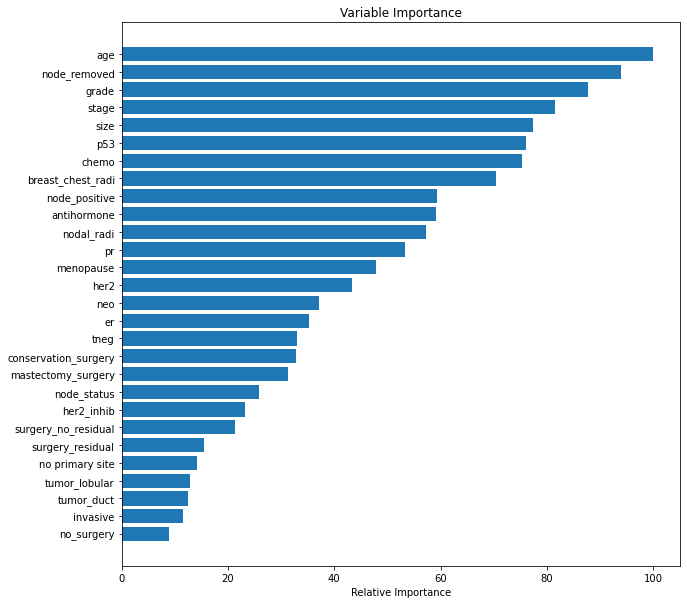

In [41]:
#Plot feature importances
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()